In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyart
from render import *


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/anaconda3/lib/python3.7/site-packages/pyart/graph/cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/anaconda3/lib/python3.7/site-packages/pyart/graph/cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/anaconda3/lib/python3.7/site-packages/pandas/core/tools/datetimes.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/anaconda3/lib/python3.7/site-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if not isinstance(key, collections.Hashable):
/anaconda3/lib/python3.7/site-packages/h5py/_hl/base

# Implementation of rendering

In [2]:
radar_legacy = pyart.io.read_nexrad_archive('KBGM20100911_012056_V03.gz')
radar_dualpol = pyart.io.read_nexrad_archive('KBGM20150508_065830_V06.gz')
radar = radar_dualpol

/anaconda3/lib/python3.7/site-packages/pyart/io/nexrad_archive.py:226: UserWarning: Gate spacing is not constant, interpolating data in scans [6, 7] for moment REF.
  UserWarning)


In [3]:
def test_get_sweeps():
    
    fields = {
        'dz': 'reflectivity',
        'vr': 'velocity',
        'sw': 'spectrum_width',
        'dr': 'differential_reflectivity',
        'rh': 'cross_correlation_ratio',
        'ph': 'differential_phase'
    }
    
    for key, field in fields.items():
        sweeps = get_sweeps(radar, field)
        print(key, ":", [sweep['sweepnum'] for sweep in sweeps])
        
test_get_sweeps()

dz : [0, 2, 4, 6, 7]
vr : [1, 3, 5, 6, 7]
sw : [1, 3, 5, 6, 7]
dr : [0, 2, 4, 6, 7]
rh : [0, 2, 4, 6, 7]
ph : [0, 2, 4, 6, 7]


In [4]:
# def cart2pol(x, y):
#     '''
#     Convert from Cartesian coordinates to polar coordinate

#     theta, rho = cart2pol( x, y)

#     Parameters
#     ----------
#     x, y: array-like
#         Horizontal coordinate and vertical coordinate

#     Returns
#     -------
#     theta, rho: array-like 
#         Input arrays: angle in radians, distance from origin

#     See Also
#     --------
#     pol2cart    
#     '''
#     theta = np.arctan2(y, x)
#     rho = np.hypot(x, y)
#     return theta, rho

# def pol2cart(theta, rho):
#     '''Convert from polar coordinate to Cartesian coordinates

#     Parameters
#     ----------
#     theta, rho: array-like 
#         Input arrays: angle in radians, distance from origin

#     Returns
#     -------
#     x, y: array-like
#         Horizontal coordinate and vertical coordinate

#     See Also
#     --------
#     cart2pol
#     '''
#     x = rho * np.cos(theta)
#     y = rho * np.sin(theta)
#     return x, y

# def pol2cmp( theta ):
#     '''Convert from mathematical angle to compass bearing

#     Parameters
#     ----------
#     theta: array-like
#         angle in radians counter-clockwise from positive x-axis

#     Returns
#     -------
#     bearing: array-like
#         angle in degrees clockwise from north

#     See Also
#     --------
#     cmp2pol
#     '''
#     bearing = np.rad2deg(np.pi/2 - theta)
#     bearing = np.mod(bearing, 360)
#     return bearing

# def cmp2pol(bearing):
#     '''Convert from compass bearing to mathematical angle

#     Parameters
#     ----------
#     bearing: array-like
#         Angle measured in degrees clockwise from north

#     Returns
#     -------
#     theta: array-like
#         angle in radians counter-clockwise from positive x-axis

#     See Also
#     --------
#     pol2cmp
#     '''
#     theta = np.deg2rad(90 - bearing)
#     theta = np.mod(theta, 2*np.pi)
#     return theta



# def slant2ground( r, theta ):
#     '''
#     Convert from slant range and elevation to ground range and height.
    
#     Parameters
#     ----------
#     r: array
#         Range along radar path in m
#     theta: array
#         elevation angle in degrees
    
#     Returns
#     -------
#     s: array
#         Range along ground (great circle distance) in m
#     h: array
#         Height above earth in m

#     Uses spherical earth with radius 6371.2 km
    
#     From Doviak and Zrnic 1993 Eqs. (2.28b) and (2.28c)
    
#     See also
#     https://bitbucket.org/deeplycloudy/lmatools/src/3ad332f9171e/coordinateSystems.py?at=default
    
#     See Also
#     --------
#     pyart.core.antenna_to_cartesian
#     '''
    
#     earth_radius = 6371200.0           # from NARR GRIB file
#     multiplier = 4.0 / 3.0

#     r_e = earth_radius * multiplier    # earth effective radius

#     theta = np.deg2rad(theta)          # convert to radians

#     z = np.sqrt( r**2 + r_e**2 + (2 * r_e * r * np.sin(theta))) - r_e
#     s = r_e * np.arcsin( r * np.cos(theta) / ( r_e + z ) )
    
#     return s, z


In [5]:
# def radarInterpolant( data, az, rng, method="nearest"):
        
#     m, n = data.shape
    
#     I = np.argsort(az)
#     az = az[I]
#     data = data[I,:]

#     # Replicate first and last radials on opposite ends of array
#     # to correctly handle wrapping
#     az   = np.hstack((az[-1]-360, az, az[0]+360))
    
#     data = np.vstack((data[-1,:],
#                       data,
#                       data[0,:]))
    
#     # Ensure strict monotonicity
#     delta = np.hstack((0, np.diff(az)))   # difference between previous and this
    
#     az = az + np.where(delta==0, 0.001, 0.0)  # add small amount to each azimuth that
#                                               #  is the same as predecessor
    
#     # Create interpolating function
#     return RegularGridInterpolator((az, rng), data, 
#                                    method=method,
#                                    bounds_error=False,
#                                    fill_value=np.nan)


In [6]:
# VALID_FIELDS = ['reflectivity',
#                 'velocity',
#                 'spectrum_width',
#                 'differential_reflectivity',
#                 'cross_correlation_ratio',
#                 'differential_phase']
        
# def radar2mat(radar, 
#               fields = None, 
#               coords = 'polar',
#               r_min  = 2125.0,     # default: first range bin of WSR-88D 
#               r_max  = 459875.0,   # default: last range bin
#               r_res  = 250,        # default: super-res gate spacing
#               az_res = 0.5,        # default: super-res azimuth resolution
#               dim    = 600,        # num pixels on a side in Cartesian rendering
#               sweeps = None,
#               elevs  = np.linspace(0.5, 4.5, 5),
#               use_ground_range = True,
#               interp_method='nearest'):

    
#     '''
#     Input parsing and checking
#     '''    

#     # Get available fields
#     available_fields = list(radar.fields.keys())
    
#     # Assemble list of fields to render, with error checking
#     if fields is None:
#         fields = available_fields
        
#     elif isinstance(fields, (list, np.array)):
        
#         fields = np.array(fields) # convert to numpy array
        
#         valid     = np.in1d(fields, VALID_FIELDS)
#         available = np.in1d(fields, available_fields)

#         if not(np.all(valid)):
#             raise ValueError("fields %s are not valid" % (fields[valid != True]))

#         if not(np.all(available)):
#             warnings.warn("requested fields %s were not available" % (fields[available != True]))
        
#         fields = fields[available]
        
#     else:
#         raise ValueError("fields must be None or a list")

        
#     ''' 
#     Get indices of desired sweeps (within unique sweeps), save in "sweeps" variable
#     '''
#     _, available_elevs = get_tilts(radar)
    
#     if sweeps is not None:
#         warnings.warn('Both sweeps and elevs are specified. Using sweeps')
#     elif elevs is not None:
#         # Use interp1d to map requested elevation to nearest available elevation
#         # and report the index
#         inds = np.arange(len(available_elevs))
#         elev2ind = interp1d(available_elevs, inds, kind='nearest', fill_value="extrapolate")
#         sweeps = elev2ind(elevs)
#     else:
#         raise ValueError("must specify either sweeps or elevs")
    
    
#     '''
#     Construct coordinate matrices PHI, R for query points
#     '''    
#     if coords == 'polar':
#         # Query points
#         r   = np.arange(r_min, r_max, r_res)
#         phi = np.arange(az_res, 360, az_res)
#         PHI, R = np.meshgrid(phi, r)
        
#         # Coordinates of three dimensions in output array
#         x1 = r
#         x2 = phi
#         x3 = elevs
 
#     elif coords == 'cartesian':
#         x = y = np.linspace (-r_max, r_max, dim)
#         [X, Y] = np.meshgrid(x, y)
#         [PHI, R] = cart2pol(X, Y)
#         PHI = pol2cmp(PHI)  # convert from radians to compass heading
        
#         # Coordinates of three dimensions in output array
#         x1 = y
#         x2 = x
#         x3 = elevs

#     else:
#         raise ValueError("inavlid coords: %s" % (coords))
    
    
#     '''
#     Build the output 3D arrays
#     ''' 
#     data = dict()   
    
#     m,n = PHI.shape
#     nsweeps = len(sweeps)
    
#     for field in fields:
#         data[field] = np.empty((m, n, nsweeps))
        
#         sweeps = get_sweeps(radar, field)
        
#         for i, sweep in enumerate(sweeps):
            
#             az = sweep['az']
#             rng = sweep['rng']

#             if use_ground_range:
#                 rng, _ = slant2ground(rng, sweep['fixed_angle'])
            
#             F = radarInterpolant(sweep['data'], az, rng, method=interp_method)

#             data[field][:,:,i] = F((PHI, R))
    
#     return data, x1, x2, x3


def test_radar2mat():

    # read in some data
    radar_legacy = pyart.io.read_nexrad_archive('KBGM20100911_012056_V03.gz')
    radar_dualpol = pyart.io.read_nexrad_archive('KBGM20150508_065830_V06.gz')
    radar = radar_dualpol
    
    # ValueError correctly raised when invalid field requested
    try:
        f = radar2mat(radar, fields=['reflectivity', 'foo'])
    except ValueError:
        print("success")
    
    # warning issued if field not available
    f = radar2mat(radar_legacy, fields=['differential_reflectivity', 'velocity'])

    # ValueError correctly raised when invalid field requested
    try:
        f = radar2mat(radar, coords='foo')
    except ValueError:
        print("success")

#test_radar2mat()

In [10]:
%%time

data, y, x, elev = radar2mat(radar, coords='cartesian', dim=600, r_max=150000)

CPU times: user 4.2 s, sys: 186 ms, total: 4.38 s
Wall time: 2.21 s


In [11]:
data['reflectivity'].shape

(5, 600, 600)

CPU times: user 41.9 ms, sys: 2.79 ms, total: 44.7 ms
Wall time: 31.7 ms


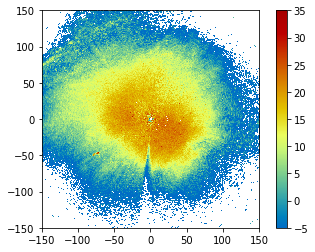

In [12]:
%%time

plt.imshow(data['reflectivity'][0,:,:],
           extent = (x[0]/1000, x[-1]/1000, y[0]/1000, y[-1]/1000),
           origin='lower', 
           vmin=-5, vmax=35,
           cmap=pyart.config.get_field_colormap('reflectivity'))

plt.colorbar()

# Read rendered array from .mat file

In [13]:
radar = pyart.io.read_nexrad_archive('KBGM20100911_012056_V03.gz')
#radar = pyart.io.read_nexrad_archive('KBGM20150508_065830_V06.gz')

import scipy.io
d = scipy.io.loadmat('render.mat')
DZ_MAT = d['DZ']
VR_MAT = d['VR']
SW_MAT = d['SW']
y_mat  = d['y'].ravel()
x_mat  = d['x'].ravel()
elev_mat = d['elev'].ravel()

data, y, x, elev = radar2mat(radar, coords='cartesian', dim=600, r_max=150000)

err = np.abs(DZ_MAT - data['reflectivity'])

plt.imshow(err[:,:,0], vmin=0, vmax=2, origin='lower')
plt.colorbar()

ValueError: operands could not be broadcast together with shapes (600,600,5) (5,600,600) 

# Tests to probe Py-ART radar object

VCP 31


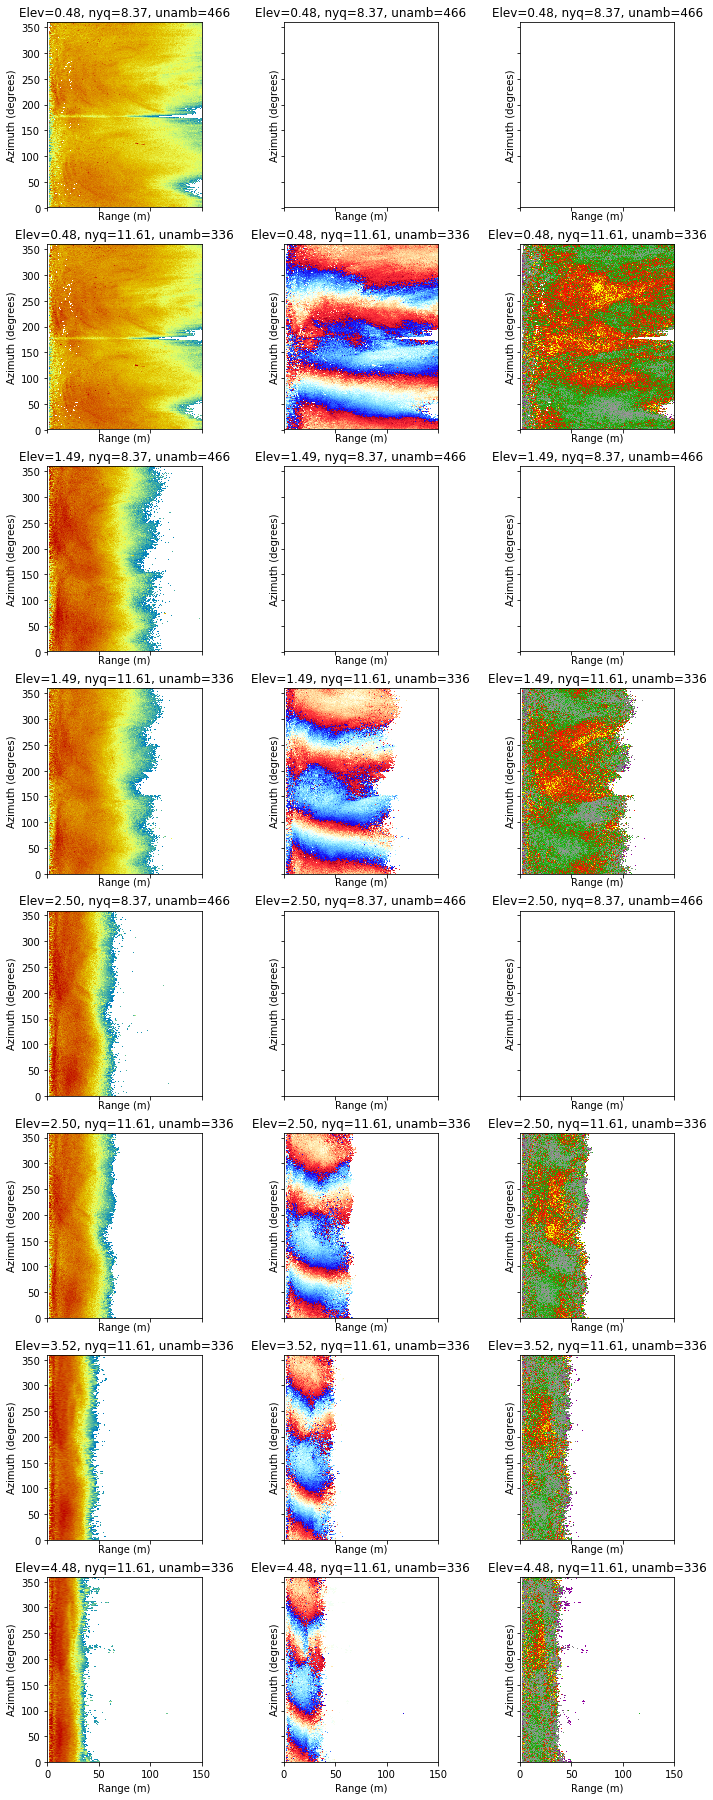

In [25]:
rmax = 150

# for key, val in radar.fields.items():
#     print(key)
#     print(val['data'].shape)
    
print("VCP %d" % (radar.metadata['vcp_pattern']))

fields = ['reflectivity', 'velocity', 'spectrum_width']

m, n = radar.nsweeps, len(fields)

fig, axs = plt.subplots(figsize=(12,4*m),
                       nrows=m, ncols=n, 
                       sharex=True, sharey=True)

copy=False

for i in range(m):
    
    rng = radar.range['data']
    elev = radar.get_elevation(i, copy=copy)
    az = radar.get_azimuth(i, copy=copy)
    
    nyq_vel = radar.get_nyquist_vel(i)
    unambiguous_range = get_unambiguous_range(radar, i) # not a class method
    fixed_angle = radar.fixed_angle['data'][i]
    
    # Sort by azimuth
    I = np.argsort(az)
    
    az = az[I]
    elev = elev[I]
    #print(rng, az, elev)

    for j in range(n):
        field = fields[j]
        data = radar.get_field(i, field, copy=copy)
        data = data[I,:]
    
        ax = axs[i,j]
        
        ax.imshow(data, 
                   extent=(rng[0]/1000,rng[-1]/1000,az[0],az[-1]),
                   aspect=0.5,
                   cmap=pyart.config.get_field_colormap(field))

        #plt.colorbar()
        
        ax.set_xlim(0,rmax)

        ax.set_xlabel('Range (m)')
        ax.set_ylabel('Azimuth (degrees)')
        ax.set_title('Elev=%.2f, nyq=%.2f, unamb=%.2d' % (fixed_angle, nyq_vel, unambiguous_range/1000))


In [26]:
print(radar.fields['reflectivity'])

{'units': 'dBZ', 'standard_name': 'equivalent_reflectivity_factor', 'long_name': 'Reflectivity', 'valid_max': 94.5, 'valid_min': -32.0, 'coordinates': 'elevation azimuth range', '_FillValue': -9999.0, 'data': masked_array(
  data=[[15.0, 15.0, 19.0, ..., --, --, --],
        [17.5, 17.5, 21.0, ..., --, --, --],
        [11.0, 11.0, 15.5, ..., --, --, --],
        ...,
        [12.0, 12.0, 13.1875, ..., --, --, --],
        [10.0, 10.0, 10.9375, ..., --, --, --],
        [15.5, 15.5, 15.5, ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)}


None
None
[165.26184082 165.77270508 166.23962402 ... 192.52990723 193.51318359
 194.50744629]
ngates=1832, nrays=5040, nsweeps=8


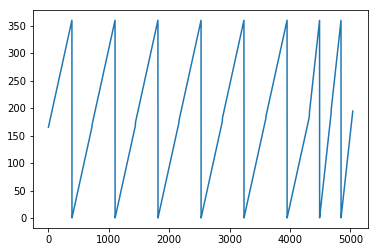

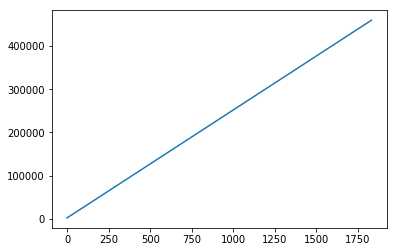

[0.5822754  0.57128906 0.57128906 ... 4.526367   4.54834    4.5703125 ]


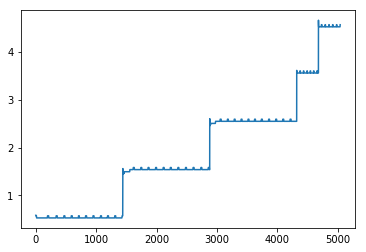

In [27]:
#print(radar.sweep_number['data'])
#print(radar.range['data'])
print(radar.rays_are_indexed)
print(radar.ray_angle_res)
print(radar.azimuth['data'])

print("ngates=%d, nrays=%d, nsweeps=%d" % (radar.ngates, radar.nrays, radar.nsweeps))

plt.plot(radar.azimuth['data'])
plt.show()

plt.plot(radar.range['data'])
plt.show()

plt.plot(radar.elevation['data'])
print(radar.elevation['data'])
plt.show()

In [29]:
print(radar.data)

AttributeError: 'Radar' object has no attribute 'data'

In [30]:
radar.fields['velocity']['data']

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [-2.0, -2.0, -10.5, ..., --, --, --],
        [-6.5, -6.5, -10.0, ..., --, --, --],
        [-5.5, -5.5, -5.0, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

In [31]:
print(radar.instrument_parameters['unambiguous_range']['data'].shape)
print(radar.instrument_parameters['nyquist_velocity']['data'].shape)

(5040,)
(5040,)


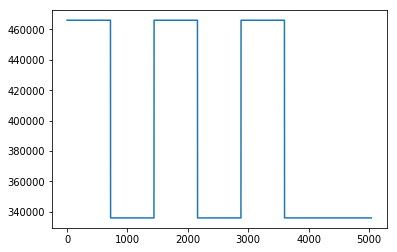

In [32]:
plt.plot(radar.instrument_parameters['unambiguous_range']['data'])

In [33]:
'x' in ['a', 'b', 'x']

True

# Basic Tests of Py-ART (display etc.)

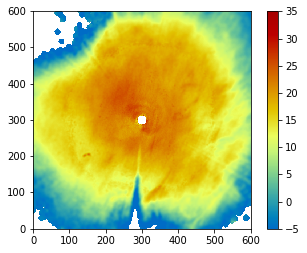

In [34]:
# mask out last 10 gates of each ray, this removes the "ring" around th radar.
#radar.fields['reflectivity']['data'][:, -10:] = np.ma.masked

# exclude masked gates from the gridding
# gatefilter = pyart.filters.GateFilter(radar)
# gatefilter.exclude_transition()
# gatefilter.exclude_masked('reflectivity')

dzlim = (-5, 35)

height = 1000 # meters?
rmax   = 150000 
dim    = 600

# perform Cartesian mapping, limit to the reflectivity field.
grid = pyart.map.grid_from_radars(
    (radar,), 
    grid_shape=(1, dim, dim),
    grid_limits=((height, height), 
                 (-rmax, rmax), 
                 (-rmax, rmax)),
    fields=['reflectivity'],
    weighting_function="Barnes2"
)

# create the plot
plt.imshow(grid.fields['reflectivity']['data'][0], 
           origin='lower', 
           vmin=dzlim[0], 
           vmax=dzlim[1],
          cmap='pyart_HomeyerRainbow')
plt.colorbar()
plt.show()

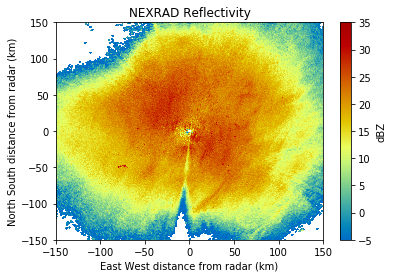

In [35]:
# Use RadarDisplay to show reflectivity
display = pyart.graph.RadarDisplay(radar)
# plot super resolution reflectivity

rmax = 150 # km
lim = (-rmax, rmax)
display.plot('reflectivity', 0, title='NEXRAD Reflectivity',
             vmin=-5, vmax=35, colorbar_label='dBZ')
display.plot_range_ring(radar.range['data'][-1]/1000.)
display.set_limits(xlim=lim, ylim=lim)
plt.show()